Importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

Importing the train dataset:

In [2]:
import os
dir = os.getcwd()
os.chdir("..")

train_data = pd.read_csv("datasets/train.txt", sep = ';')
os.chdir(dir)


View the summary of our train dataset:

In [3]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


View the number of categories in the categorical variable **emotion**:

In [4]:
train_data["emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

Let us attempt to plot a countplot to visualize the data:

Text(0, 0.5, 'Count')

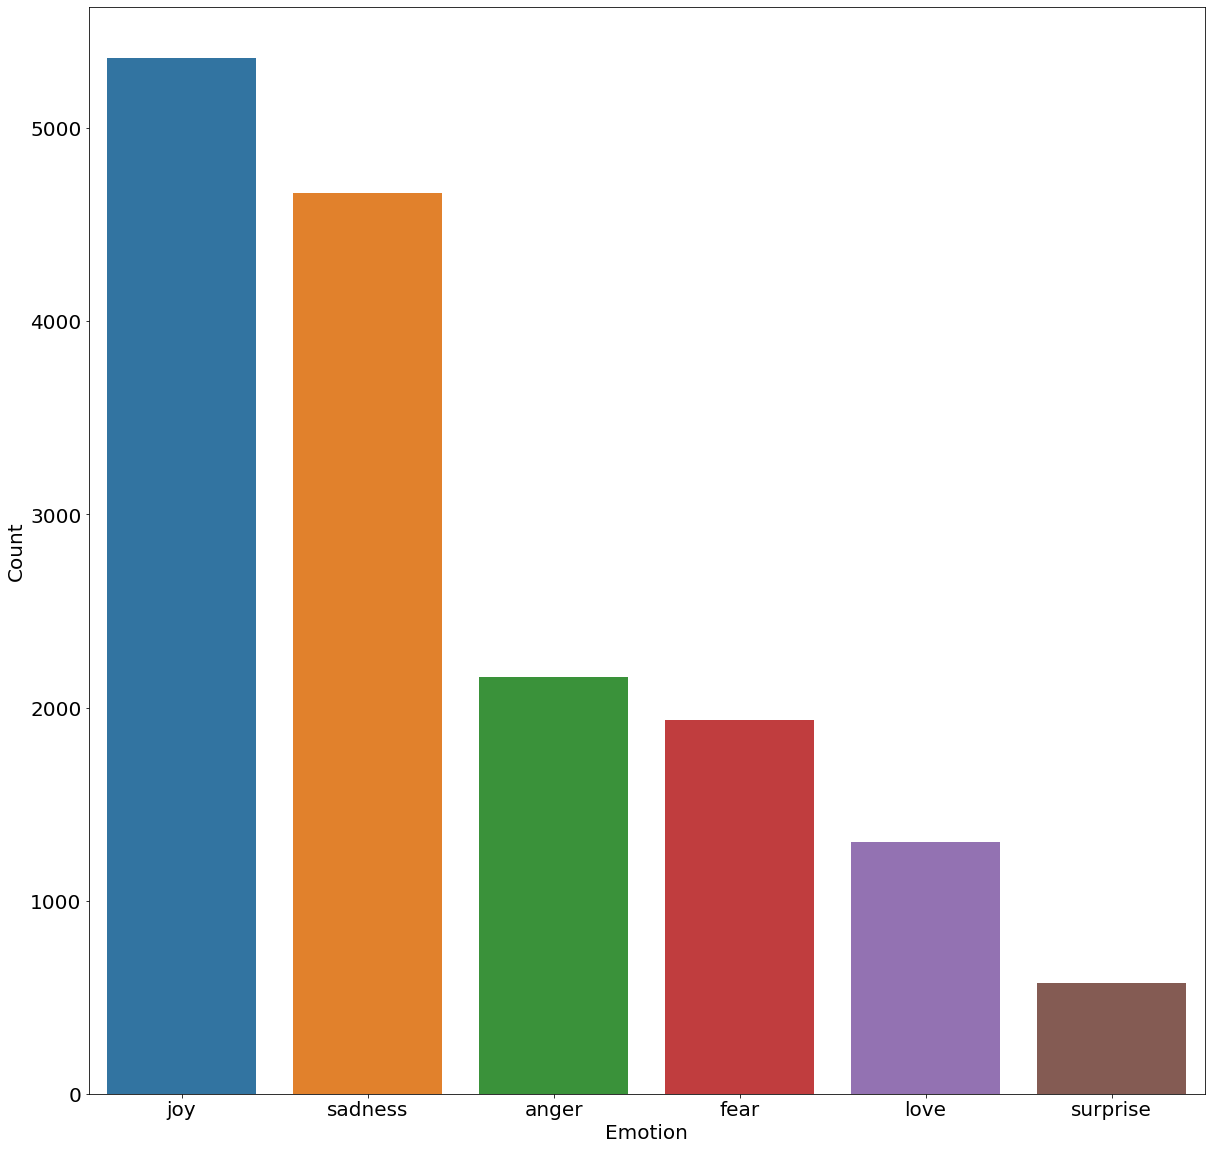

In [5]:
plt.figure(figsize=(20, 20))
plt.xticks(size = 20)
plt.yticks(size = 20)

plot = sb.countplot(x = 'emotion', data = train_data, order = train_data["emotion"].value_counts().index)
plot.set_xlabel("Emotion", fontsize = 20)
plot.set_ylabel("Count", fontsize = 20)

From the visualization, we see that there are a total of **6** different emotions in the given dataset. <br>
The visualisation above shows the different emotions in descending order of amount.

Now we begin to clean our dataset:

In [6]:
train_data['clean_text'] = train_data['text'].apply(nfx.remove_stopwords)
train_data['clean_text'] = train_data['clean_text'].apply(nfx.remove_userhandles)

Let us view the cleaned data compared to the original data given:

In [7]:
print(train_data.filter(['clean_text', 'text']))

                                              clean_text  \
0                                  didnt feel humiliated   
1            feeling hopeless damned hopeful cares awake   
2              im grabbing minute post feel greedy wrong   
3              feeling nostalgic fireplace know property   
4                                        feeling grouchy   
...                                                  ...   
15995      brief time beanbag said anna feel like beaten   
15996  turning feel pathetic waiting tables subbing t...   
15997                           feel strong good overall   
15998                     feel like rude comment im glad   
15999                       know lot feel stupid portray   

                                                    text  
0                                i didnt feel humiliated  
1      i can go from feeling so hopeless to so damned...  
2       im grabbing a minute to post i feel greedy wrong  
3      i am ever feeling nostalgic about th

Finally, we save the cleaned dataset to a new file to be accessed by the subsequent processes.

In [9]:
dir = os.getcwd()
os.chdir("..")


train_data.to_csv('datasets/clean_train.csv', sep = ';', header = True)
os.chdir(dir)